In [1]:
# Final Project on Data Analytics using Python:
# Hospital beds capacity for Covid-19: India & USA.

In [2]:
# The Comments/Conclusions are added as comments.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df1 = pd.read_csv("india_data.csv")
df2 = pd.read_csv("usa_data.csv")

In [5]:
print(df1.shape)
print(df2.shape)

(37, 12)
(5713, 12)


In [6]:
# The raw data of India's hospital beds capacity contains 37 rows & 12 coulmns.
# Whereas, raw data of USA's hospital beds capacity contains 5713 rows & 12 coulmns.

In [7]:
df1.columns

Index(['country', 'state', 'county', 'lat', 'lng', 'type', 'measure', 'beds',
       'population', 'year', 'source', 'source_url'],
      dtype='object')

In [8]:
# Thus, both the raw datasets provide information about:
# 'country', 'state', 'county', 'latitude', 'longitude', 'type of beds', 'type of measure', 'number of beds per thousand', 'population', 'source year', 'source of data' & 'URL of original source'.

In [9]:
df1['state'].nunique()

37

In [10]:
df2['state'].nunique()

51

In [11]:
# So, the datasets talk about 37 states of India and 51 states of USA respectively.

In [12]:
df2['county'].nunique()

1850

In [13]:
# So, the data set of USA talks about 1850 counties.

In [14]:
df1 = df1.replace(np.nan,'',regex=True)
df2 = df2.replace(np.nan,'',regex=True)

In [15]:
# NaN values have been inserted.

In [16]:
df1['state'][df1['beds'] == df1['beds'].max()]

18    LD
Name: state, dtype: object

In [17]:
# Lakshdweep is the state with most number of Beds per 1000 individuals in India.

In [18]:
df1['state'][df1['beds'] == df1['beds'].min()]

4    BR
Name: state, dtype: object

In [19]:
# Bihar is the state with least number of Beds per 1000 individuals in India.

In [20]:
df2['county'][df2['beds'] == df2['beds'].max()]

1764    pawnee
Name: county, dtype: object

In [21]:
# In USA, Pawnee county has most number of Beds per 1000 individuals.

In [22]:
df1.describe()

,lat,lng,beds,population,year
count,37.000000,37.000000,37.000000,3.700000e+01,37.000000
mean,22.500439,81.595037,1.067674,7.063516e+07,2016.756757
std,6.490228,7.347561,0.885002,2.216202e+08,1.211184
min,8.295441,71.192400,0.094838,7.978800e+04,2014.000000
25%,19.751500,76.085600,0.436072,1.510000e+06,2016.000000
50%,23.164500,79.019300,0.815190,2.630000e+07,2017.000000
75%,27.023800,87.855000,1.322517,5.306000e+07,2018.000000
max,33.778200,94.727800,3.614458,1.353000e+09,2018.000000


In [23]:
# We can conclude from the above table:
# 1. On an average there are 1.068 beds per 1000 individuals of a state in India.
# 2. The avarage value of the beds per 1000 individuals deviates within a range of 0.885
# 3. Considering the worst case scenario, Bihar is a state with the lowest number of beds per 1000 individuals, i.e. 0.095.
# 4. Considering the best case scenario, Lakshdweep is a great example with 3.614 beds per 1000 individuals.
# 5. The data consists information from 2014 to 2018.

In [24]:
df2.describe()

,lat,lng,beds,population,year
count,5713.000000,5713.000000,5713.000000,5.713000e+03,5713.000000
mean,38.038590,-91.593572,1.647644,1.716983e+05,2018.280763
std,5.362105,13.230439,3.101818,4.624376e+05,0.907452
min,19.898682,-155.665857,0.000000,7.400000e+01,2012.000000
25%,33.836081,-99.901813,0.141784,1.708800e+04,2018.000000
50%,37.964253,-89.398528,0.616614,4.282600e+04,2018.000000
75%,41.492537,-82.907123,2.225851,1.370960e+05,2019.000000
max,63.588753,-69.445469,90.466352,1.010572e+07,2020.000000


In [25]:
# We can conclude from the above table:
# 1. On an average there are 1.648 beds per 1000 individuals of a county in USA.
# 2. The avarage value of the beds per 1000 individuals deviates within a range of 3.102.
# 3. Considering the worst case scenario, there are some counties with no beds available at all.
# 4. Considering the best case scenario, Pawnee county is a great example with 90.466 beds per 1000 individuals.
# 5. The data consists information from 2012 to 2020.

In [26]:
df1.set_index('state',inplace=True)

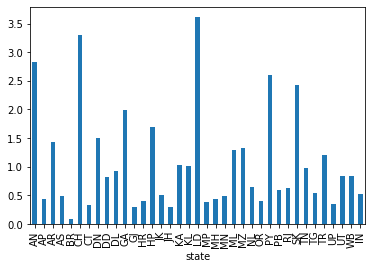

In [27]:
%matplotlib inline
df1.beds.plot.bar()

In [28]:
# The above bar graph represents the number of number of beds per 1000 individuals in each state.
# We can observe that Lakshdweep (LD) has the highest value while Bihar (BR) has the lowest value.
# Andaman (AN), Chandigarh (CH), Puducherry (PY) & Sikkim (SK) are some other states with a high number of beds per 1000.

In [29]:
df1 = df1.reset_index(drop=True)

In [30]:
df2 = df2.reset_index(drop=True)

In [31]:
df3 = pd.concat([df1, df2], keys=["India", "USA"])
df3

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


beds country    county        lat         lng  measure  \
India 0     2.825081      IN            11.740100   92.658600  1000HAB   
      1     0.436072      IN            15.912900   79.740000  1000HAB   
      2     1.427893      IN            28.218000   94.727800  1000HAB   
      3     0.497753      IN            26.200600   92.937600  1000HAB   
      4     0.094838      IN            25.096100   85.313100  1000HAB   
...              ...     ...       ...        ...         ...      ...   
USA   5708  2.023316      US     uinta  43.075968 -107.290284  1000HAB   
      5709  0.289045      US     uinta  43.075968 -107.290284  1000HAB   
      5710  8.815878      US     uinta  43.075968 -107.290284  1000HAB   
      5711  2.181025      US  washakie  43.075968 -107.290284  1000HAB   
      5712  1.686104      US    weston  43.075968 -107.290284  1000HAB   

            population  source  \
India 0         380520     nhp   
      1       53060000     nhp   
      2        1683600     nhp   
      3       34438756     nhp   
      4      122988691     nhp   
...                ...     ...   
USA   5708       20758  arcgis   
      5709       20758     khn   
      5710       20758  arcgis   
      5711        8253  arcgis   
      5712        7117  arcgis   

                                                   source_url state  \
India 0      http://www.cbhidghs.nic.in/showfile.php?lid=1147   NaN   
      1      http://www.cbhidghs.nic.in/showfile.php?lid=1147   NaN   
      2      http://www.cbhidghs.nic.in/showfile.php?lid=1147   NaN   
      3      http://www.cbhidghs.nic.in/showfile.php?lid=1147   NaN   
      4      http://www.cbhidghs.nic.in/showfile.php?lid=1147   NaN   
...                                                       ...   ...   
USA   5708  https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...    WY   
      5709  https://khn.org/news/as-coronavirus-spreads-wi...    WY   
      5710  https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...    WY   
      5711  https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...    WY   
      5712  https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...    WY   

                   type  year  
India 0           TOTAL  2016  
      1           TOTAL  2017  
      2           TOTAL  2018  
      3           TOTAL  2017  
      4           TOTAL  2018  
...                 ...   ...  
USA   5708        ACUTE  2018  
      5709          ICU  2019  
      5710  PSYCHIATRIC  2018  
      5711          ICU  2018  
      5712          ICU  2018  

[5750 rows x 12 columns]

In [32]:
df3.describe()

,beds,lat,lng,population,year
count,5750.000000,5750.000000,5750.000000,5.750000e+03,5750.000000
mean,1.643912,37.938606,-90.479140,6.251154e+05,2018.270957
std,3.092961,5.511329,19.132542,1.842610e+07,0.917719
min,0.000000,8.295441,-155.665857,7.400000e+01,2012.000000
25%,0.142981,32.354668,-99.901813,1.716700e+04,2018.000000
50%,0.619036,37.964253,-89.398528,4.332150e+04,2018.000000
75%,2.217245,41.492537,-82.907123,1.413140e+05,2019.000000
max,90.466352,63.588753,94.727800,1.353000e+09,2020.000000


In [33]:
# If we combine the data sets of India and USA, we find that, on an average there are 1.644 hospitals beds per 1000.
# The standard deviation is equal to 3.093

In [34]:
pd.crosstab(df2.state,df2.year, margins=True)

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
state,,,,,,,,,,
AK,0,0,0,0,0,0,11,26,0,37
AL,1,0,0,0,1,1,80,63,0,146
AR,3,0,0,0,4,1,61,53,0,122
AZ,0,0,0,0,0,2,22,13,0,37
CA,0,0,0,1,2,14,82,58,0,157
CO,0,0,0,1,1,3,59,40,0,104
CT,0,0,0,0,0,0,8,10,0,18
DC,0,0,0,0,0,0,0,1,0,1
DE,0,0,0,0,0,0,6,3,0,9


In [35]:
# The above table shows the number of records per year for every state. 
# This can help in understand the recency of data provided.
# This also shows the total number of records per state & per year as well.

In [36]:
pd.crosstab(df2.state,df2.year, normalize='index')

year,2012,2013,2014,2015,2016,2017,2018,2019,2020
state,,,,,,,,,
AK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.297297,0.702703,0.000000
AL,0.006849,0.000000,0.000000,0.000000,0.006849,0.006849,0.547945,0.431507,0.000000
AR,0.024590,0.000000,0.000000,0.000000,0.032787,0.008197,0.500000,0.434426,0.000000
AZ,0.000000,0.000000,0.000000,0.000000,0.000000,0.054054,0.594595,0.351351,0.000000
CA,0.000000,0.000000,0.000000,0.006369,0.012739,0.089172,0.522293,0.369427,0.000000
CO,0.000000,0.000000,0.000000,0.009615,0.009615,0.028846,0.567308,0.384615,0.000000
CT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.555556,0.000000
DC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
DE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000


In [37]:
# The above table shows the percent-wise distribution of records per year for each state.

In [38]:
df1.corr()

,lat,lng,beds,population,year
lat,1.000000,0.161337,-0.303197,-0.032144,0.032337
lng,0.161337,1.000000,-0.013255,-0.091843,-0.184811
beds,-0.303197,-0.013255,1.000000,-0.203921,0.054384
population,-0.032144,-0.091843,-0.203921,1.000000,0.189066
year,0.032337,-0.184811,0.054384,0.189066,1.000000


In [39]:
# The above correlation shows us that population of the state & number of beds per 1000 are inversely proportional to each other, i.e. negative correlation.
# 1 percent increase in population causes a decrease of 0.204 percents in number of beds per 1000, which is worse compared to USA.

In [40]:
df2.corr()

,lat,lng,beds,population,year
lat,1.000000,-0.204720,0.044166,-0.039848,-0.001716
lng,-0.204720,1.000000,-0.054879,-0.051430,0.013802
beds,0.044166,-0.054879,1.000000,-0.067058,-0.268800
population,-0.039848,-0.051430,-0.067058,1.000000,-0.066736
year,-0.001716,0.013802,-0.268800,-0.066736,1.000000


In [41]:
# The above correlation shows us that population of the county & number of beds per 1000 are inversely proportional to each other, i.e. negative correlation.
# 1 percent increase in population causes a decrease of 0.067 percents in number of beds per 1000, which is better compared to India.

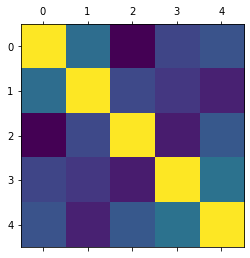

In [44]:
plt.matshow(df1.corr())
plt.show()

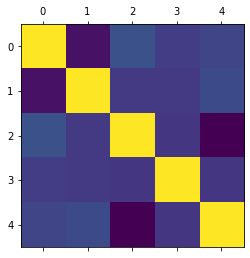

In [45]:
plt.matshow(df2.corr())
plt.show()

In [ ]:
# The above graphs help us understand the other correlations as well.

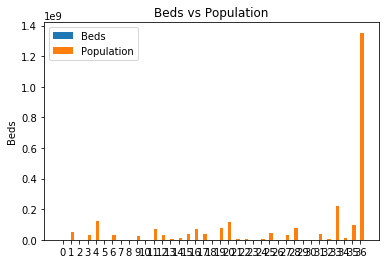

In [46]:
xpos = np.arange(len(df1.index))

plt.bar(xpos-0.2,df1.beds, width=0.4, label="Beds")
plt.bar(xpos+0.2,df1.population, width=0.4,label="Population")

plt.xticks(xpos,df1.index)
plt.ylabel("Beds")
plt.title('Beds vs Population')
plt.legend()

(array([10.,  8.,  7.,  5.,  1.,  1.,  1.,  2.,  0.,  2.]),
 array([0.094838, 0.4468  , 0.798762, 1.150724, 1.502686, 1.854648,
        2.20661 , 2.558572, 2.910534, 3.262496, 3.614458]),
 <a list of 10 Patch objects>)

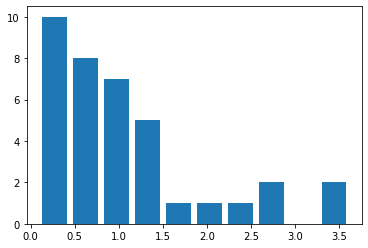

In [47]:
plt.hist(df1.beds, rwidth=0.8)

In [ ]:
# The above histogram shows us that number of beds per 1000 are lower than 1.5 in most of the states of India.

(array([5.61e+03, 7.10e+01, 2.10e+01, 4.00e+00, 4.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([ 0.       ,  9.0466352, 18.0932704, 27.1399056, 36.1865408,
        45.233176 , 54.2798112, 63.3264464, 72.3730816, 81.4197168,
        90.466352 ]),
 <a list of 10 Patch objects>)

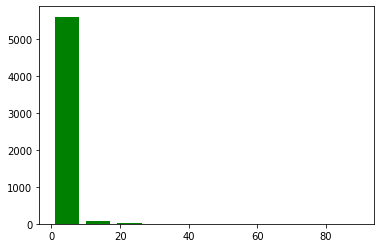

In [48]:
plt.hist(df2.beds, rwidth=0.8, color='g')

In [ ]:
# The above histogram shows us that the number of beds per 1000 is almost same in most of the counties in USA. 
# There are some rare cases having more number of beds per 1000. 

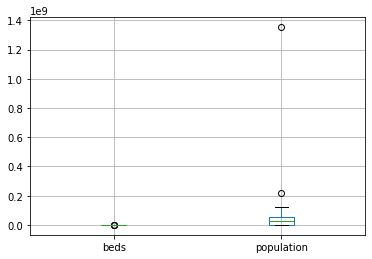

In [49]:
df1[['beds','population']].boxplot()

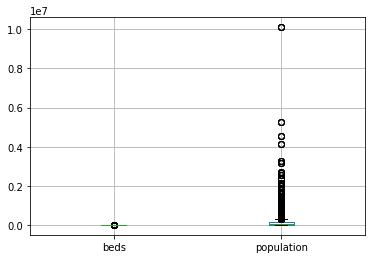

In [50]:
df2[['beds','population']].boxplot()

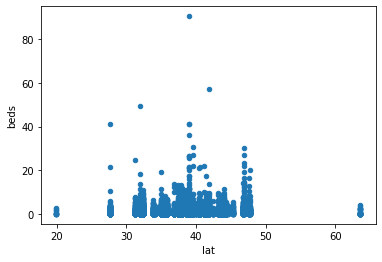

In [55]:
df2.plot.scatter(x='lat',y='beds')

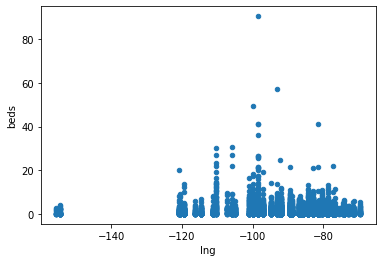

In [56]:
df2.plot.scatter(x='lng',y='beds')

In [57]:
#The above two scatterplots help us to understand that density of beds w.r.t. population is skewed towards Central and Eastern parts of USA.